<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Краткий-вывод" data-toc-modified-id="Краткий-вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Краткий вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Математическое-обоснование" data-toc-modified-id="Математическое-обоснование-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Математическое обоснование</a></span></li><li><span><a href="#Проверка-расчетов" data-toc-modified-id="Проверка-расчетов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка расчетов</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><b>Общий вывод по проекту</b></a></span></li><li><span><a href="#Общий-вывод-по-проекту-В2" data-toc-modified-id="Общий-вывод-по-проекту-В2-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><b>Общий вывод по проекту В2</b></a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
!pip install phik

In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 
import phik

In [3]:
try:
    clients_data = pd.read_csv('/datasets/insurance.csv')
except:
    clients_data = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

In [4]:
clients_data

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [5]:
clients_data.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


In [6]:
clients_data.phik_matrix()

interval columns not set, guessing: ['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.000000,0.000000,0.0,0.032181
Возраст,0.000000,1.000000,0.071073,0.0,0.884865
Зарплата,0.000000,0.071073,1.000000,0.0,0.000000
Члены семьи,0.000000,0.000000,0.000000,1.0,0.000000
Страховые выплаты,0.032181,0.884865,0.000000,0.0,1.000000


у целеквого признака присутствует сильная положительная корреляция с данными в столбце Возраст, с остальными столюцами корреляция близка к нулю

In [7]:
clients_data.shape

(5000, 5)

In [8]:
clients_data.duplicated().sum()

153

В данных присутствуют дбликаты

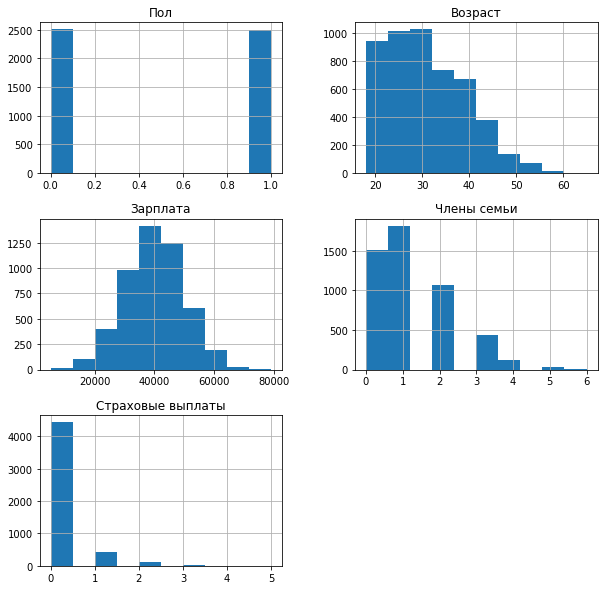

In [9]:
clients_data.hist(figsize=(10, 10));

In [10]:
clients_data.isnull().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [11]:
clients_data.dtypes

Пол                    int64
Возраст              float64
Зарплата             float64
Члены семьи            int64
Страховые выплаты      int64
dtype: object

### Краткий вывод

на данном этапе были рассмотрены представленные данные, где обнаружено, что:
* имеется 5000 строк в 5 столбцах;
* в двнных отсутствуют пропуски;
* присутствуют дубликаты;
* присутствует сильная положительная зависимость данных в столбце "Страховые выплаты" с столбцом "Возраст";
* зависимость между другими столбцами близка к нулю.

ТК в наборе отсуствуют идентификаторы клиентов, сказать с точностью, что это полные дубликаты или это полное совпадение данных клиентов нельзя. В связи с чем удалять их не будем.  

## Умножение матриц

напишем функцию для создания матрицы

In [12]:
def new_matrix(row=4, col=4):
    res = list(
        [list(np.random.randint(1,10,col))
         for _ in range(row)]
    )
    return res

создадим функцию для расчета обратной матрицы

In [13]:
def get_matrix_inv(len_A:int=4):
    while True:
        A = new_matrix()
        det_A = np.linalg.det(A)
        if det_A == 0:
            continue
        res, tmp = [], []
        for row in range(len_A):
            for col in range(len_A):
                for j in (A[:row] + A[row + 1:]):
                    tmp.append(j[:col] + j[col + 1: ])
                res.append(
                    ((-1) ** (row + col) * (np.linalg.det(tmp))) / det_A
                )
                tmp = []
        else:
            break
    #print(det_A)
        
    return np.array(res).reshape((len_A,len_A)).T, A

альтернативныый способ получения матрицы и ее инверсии

In [14]:
def get_matrix_another(row:int=4, col:int=4):
    while True:
        matrix_A = np.random.rand(row, col)
        try:
            matrix_B = np.linalg.inv(matrix_A)
            break
        except LinAlgError:
            pass
    return matrix_B, matrix_A

матрицы можно умножить друг на друга только в том случае, если количество столбцов первой матрицы равно количеству строк второй матрицы.
при умножении заданной матрицы на обратную ей, то результатом такого действия будет еденичная матрица.

### Математическое обоснование

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

при умножении данных на случайную обратимую матрицу (Р) формула для обучения линейной регресси примет вид:
$w' = ((XP)^T (XP))^{-1} (XP)^T y$,

используя свойство транспонирования матриц $(AB)^T = B^T A^T$ 

и свойство произведения обратной матрицы где $(AB)^{-1} = B^{-1} A^{-1}$ 

раскроем скобки:

$((XP)^T (XP))^{-1}$ =  $(XP)^{-1} ((XP)^T)^{-1}$ и равно $(XP)^{-1}(P^T X^T)^{-1} $ следовательно,

$w' = (P^T X^T XP)^{-1} P^TX^T y$

используя свойство роизведения обратной матрицы и представив $A = P^T X^T X$ a $B = P$ вынесем Р за скобки и получим:

$w' = (P^{-1}(P^TX^T X)^{-1}) (P^TX^T) y$

аналогично $A = P^T$ a $B = X^T X$ :

$w' = P^{-1}(X^T X)^{-1} (P^T)^{-1} P^TX^T y$


тк $(P^T)^{-1} P^T$ будет равно единичной матрице, а при умножении матрицы на единичную ролуяаем первоначальную матрицу, то формула примет вид:

$w' = P^{-1}(X^T X)^{-1} X^T y$

учитывая, что $w = (X^T X)^{-1} X^T y$ подставим это значение в формулу:

$w' = P^{-1}w$

зная, что формула предсказания равна $a = Xw$ и соответственно $a' = XPw'$, подставив значения получим:

$a' = XPP^{-1}w$

$a' = Xw$
соответствено $a' = a$

что и тебовалось доказать)

**Ответ:** Качество линейной регрессии не изменится. 

**Обоснование:** Так как предсказания по признакам и предсказания по признакам умноженным на обратимую матрицу равны качество линейной регрессии не изменится. 

### Проверка расчетов

Разделим выборку на признаки

In [15]:
target = clients_data['Страховые выплаты'].values
train = clients_data.drop(columns='Страховые выплаты').values

In [16]:
print('тип target', type(target),'\n', 'размер', target.shape)
print('тип train', type(target),'\n', 'размер', train.shape)

тип target <class 'numpy.ndarray'> 
 размер (5000,)
тип train <class 'numpy.ndarray'> 
 размер (5000, 4)


в результяте разделения данных получили матрицу 4 * 5000 из признаков и вектор в 5000 значений

ТК матрицы можно умножить друг на друга только в том случае, если количество столбцов первой матрицы равно количеству строк второй матрицы.

создадим случайную матрицу размером 4 * 4 и обратную к ней.

In [17]:
matrix_B, matrix_A = get_matrix_another()

print(
    'умножение матрицы на обратную ',
    '' if (np.abs(
        np.round_(matrix_A @ matrix_B)) == np.eye(4)).all() else 'не ',
    'равно еденичной матрице', sep='')

умножение матрицы на обратную равно еденичной матрице


ТК из свойств матриц мы знаем, что умножение матрицы на обратную будет равно еденичной, следовательно матрица A обратная матрице B и наоборот.

для получения аналогичного результата можно воспользоватся функциями numpy

In [18]:
matrix_B, matrix_A = get_matrix_inv()

print(
    'умножение матрицы на обратную ',
    '' if (np.abs(
        np.round_(matrix_A @ matrix_B)) == np.eye(4)).all() else 'не ',
    'равно еденичной матрице', sep='')
np.linalg.det(np.array(matrix_A @ matrix_B))

умножение матрицы на обратную равно еденичной матрице


0.9999999999999971

тк детерминат единичной матрицы равен 1, а учитывая, что операции с числами с плавающей точкой (из-за особенностей языка) имеют погрешность, то можно сказать, что результатом умножения полученных матриц будет еденичная матрица.

умножим случайную матрицу на матрицу полученную из признаков

In [19]:
train_matrix = train.dot(matrix_A)

посмотрим, что получилось


In [20]:
pd.DataFrame(train_matrix, columns=clients_data.columns[: -1]).head()

,Пол,Возраст,Зарплата,Члены семьи
0,99451.0,297815.0,248297.0,347580.0
1,76278.0,228233.0,190328.0,266420.0
2,42174.0,126145.0,105203.0,147261.0
3,83530.0,250311.0,208659.0,292101.0
4,52371.0,156747.0,130700.0,182957.0


и исходная

In [21]:
clients_data.drop(columns=['Страховые выплаты']).head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


In [22]:
print('наборы ', 
      '' if (train == train_matrix).all() else 'не ',
      'равны', sep='')

наборы не равны


In [23]:
pd.DataFrame(train_matrix, columns=clients_data.columns[: -1]).corr()

,Пол,Возраст,Зарплата,Члены семьи
Пол,1.000000,0.999998,0.999999,0.999999
Возраст,0.999998,1.000000,1.000000,1.000000
Зарплата,0.999999,1.000000,1.000000,1.000000
Члены семьи,0.999999,1.000000,1.000000,1.000000


In [24]:
clients_data.drop(columns=['Страховые выплаты']).corr()

,Пол,Возраст,Зарплата,Члены семьи
Пол,1.000000,0.002074,0.014910,-0.008991
Возраст,0.002074,1.000000,-0.019093,-0.006692
Зарплата,0.014910,-0.019093,1.000000,-0.030296
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000


как видно из тфблиц двнные сильно отличаются и не соответствуют первичному набору, также и не соответсятвуют и данные о корреляции

востановим данные из преобразованной матрицы путем умножения на обратную матрицу для мартицы, которой были зашифрованы данные

In [25]:
restored_clients_data = pd.concat(
    [
        pd.DataFrame(
            np.round_(train_matrix @ matrix_B),
            columns=clients_data.drop(
                columns='Страховые выплаты').columns),
        pd.DataFrame(target, columns=['Страховые выплаты']),
    ],
    axis=1,
)
restored_clients_data.corr() == clients_data.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,True,True,True,True,True
Возраст,True,True,True,True,True
Зарплата,True,True,True,True,True
Члены семьи,True,True,True,True,True
Страховые выплаты,True,True,True,True,True


In [26]:
restored_clients_data.head() == clients_data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True


In [27]:
restored_clients_data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1.0,41.0,49600.0,1.0,0
1,-0.0,46.0,38000.0,1.0,1
2,-0.0,29.0,21000.0,-0.0,0
3,-0.0,21.0,41700.0,2.0,0
4,1.0,28.0,26100.0,-0.0,0


In [28]:
print(
    'данные клиентов ',
    '' if all(restored_clients_data == clients_data) else 'не ',
    'равны', sep='')

данные клиентов равны


как видим наборы стали идентичными. 

из данных мы видим, что преобразование путем умножения данных на матрицу и востановление данных путем умножения на обраную матрицу работает. однако стоит учеть, что в данном случае сипользовались целочисленные значения. в случае с использованием дробных значений возможна погрешность из-за особенностей языка

## Проверка алгоритма

по условию задачи нужно выявить изменения показатели метрики R2 на линейной регресси до умножения на матрицу и после

для этого создадим второй набор обучующих данных умноженный на матрицу А

таргет трогать не будем, он будет общим для обоих наборов

In [29]:
features_train, features_test, \
target_train, target_test \
= train_test_split(
    train, target,
    test_size=0.25, random_state=12345
) 
# для обычной модели

features_train_matrix, features_test_matrix, \
target_train_matrix, target_test_matrix \
= train_test_split(
    train_matrix, target,
    test_size=0.25, random_state=12345
)
# для преобразованной

In [30]:
res_dick = dict()

In [31]:
model = LinearRegression()
model.fit(features_train_matrix, target_train_matrix)
res_dick['шифрованные'] = r2_score(target_test_matrix,
                                   model.predict(features_test_matrix))

In [32]:
model.fit(features_train, target_train)
res_dick['не шифрованные'] = r2_score(target_test, model.predict(features_test))

In [33]:
pd.DataFrame(res_dick, index=['r2_score'])

,шифрованные,не шифрованные
r2_score,0.435228,0.435228


как видим из сводной таблицы даные идентичны

обратим шифрование

In [34]:
train_inv_matrix = train_matrix @ matrix_B

In [35]:
features_train_inv_matrix, features_test_inv_matrix,\
target_train_inv_matrix, target_test_inv_matrix \
= train_test_split(
    train_inv_matrix, target,
    test_size=0.25, random_state=12345
)
# для востановленной

In [36]:
model = LinearRegression()
model.fit(features_train_inv_matrix, target_train_inv_matrix)
res_dick['преобразованные'] = r2_score(target_test_inv_matrix, model.predict(features_test_inv_matrix))

In [37]:
pd.DataFrame(res_dick, index=['r2_score'])

,шифрованные,не шифрованные,преобразованные
r2_score,0.435228,0.435228,0.435228


как мы видим, метрика R2 score из-за шифрования не поменялась. 


## Вывод:

* на этапе загрузки даных были рассмотрены данные полученные от заказчика, где обнаружено, что:
* * имеется 5000 строк в 5 столбцах;
* * в двнных отсутствуют пропуски;
* * присутствуют дубликаты;
* * присутствует сильная положительная зависимость данных в столбце "Страховые выплаты" с столбцом "Возраст";
* * зависимость между другими столбцами близка к нулю.
* на этапе умножения матриц:
* * рассмотрены варианты (написаны функции) получения случайной квадратной матрицы и обратной к ней
  * дано математическое обоснование того, что предсказание модели не изменится при умножении данных на обратимую матрицу
  * проведена проверка умножения данных для обучения на обратимую матрицу, для их шифрования, с последующим их восстановлением.
* на этапе проверки работы алгоритма:
* * расчитаны метрики R2 score для шифрованных, не шифрованных и восстановленных данных
  * метрика  	R2 score не изменилась:
  * * r2_score шифрованных данных - 0.435228
    * не шифрованных данных - 0.435228
    * r2_score восстановленных данных - 0.435228